In [8]:
import pandas as pd
from chunker import Chunker
from transformers import XLMRobertaTokenizer

In [9]:
tokenizer = XLMRobertaTokenizer.from_pretrained('xlm-roberta-base')
c= Chunker(tokenizer= tokenizer, max_length= 512)

In [10]:
train = pd.read_csv('../../data/train/train.csv', delimiter=',')
train_text1 = train['text1']
train_text2 = train['text2']

In [11]:
tesst = train['text1'][49]

In [12]:
train_text1['chunks'] = train_text1.apply(lambda x: c.chunk(x))
train_text2['chunks'] = train_text2.apply(lambda x: c.chunk(x))

Token indices sequence length is longer than the specified maximum sequence length for this model (716 > 512). Running this sequence through the model will result in indexing errors
/var/folders/c6/k78nzngn7nbdd0786bxl3s0c0000gn/T/ipykernel_3305/3776371239.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_text1['chunks'] = train_text1.apply(lambda x: c.chunk(x))
/var/folders/c6/k78nzngn7nbdd0786bxl3s0c0000gn/T/ipykernel_3305/3776371239.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_text2['chunks'] = train_text2.apply(lambda x: c.chunk(x))


In [13]:
text1_lengths = []
text2_lengths = []
lengths_1 = []
lengths_2 = []
for i in range(0,4874):
    #check all the lengths of the chunks and store them with the index. at the end sort them in descending order
    #and store the index of the sorted chunks
    text1_lengths.append((i, len(train_text1['chunks'][i])))
    text2_lengths.append((i, len(train_text2['chunks'][i])))
    lengths_1.append(len(train_text1['chunks'][i]))
    lengths_2.append(len(train_text2['chunks'][i]))

text1_lengths = sorted(text1_lengths, key= lambda x: x[1], reverse= True)
text2_lengths = sorted(text2_lengths, key= lambda x: x[1], reverse= True)
print(text1_lengths)
print(text2_lengths)
   
    

[(2667, 36), (1465, 29), (1176, 24), (295, 23), (2156, 20), (1058, 18), (3973, 18), (3684, 17), (4272, 17), (663, 15), (242, 13), (1045, 13), (4339, 13), (4431, 13), (449, 12), (587, 12), (909, 12), (4336, 12), (4647, 12), (802, 11), (881, 11), (1245, 11), (1322, 11), (1323, 11), (108, 10), (207, 10), (551, 10), (898, 10), (2145, 10), (3726, 10), (4658, 10), (406, 9), (514, 9), (584, 9), (800, 9), (1013, 9), (1424, 9), (2310, 9), (2958, 9), (4522, 9), (1247, 8), (1251, 8), (1746, 8), (1808, 8), (2374, 8), (4706, 8), (64, 7), (66, 7), (206, 7), (232, 7), (390, 7), (460, 7), (554, 7), (731, 7), (1197, 7), (1278, 7), (1337, 7), (1448, 7), (1505, 7), (1526, 7), (2139, 7), (3481, 7), (3761, 7), (4835, 7), (52, 6), (99, 6), (179, 6), (397, 6), (399, 6), (494, 6), (519, 6), (520, 6), (570, 6), (629, 6), (735, 6), (776, 6), (955, 6), (1050, 6), (1054, 6), (1165, 6), (1272, 6), (1276, 6), (1303, 6), (1369, 6), (1370, 6), (1395, 6), (1502, 6), (2342, 6), (2372, 6), (2548, 6), (2629, 6), (2900, 6

In [19]:
import numpy as np

In [21]:
value, count = np.unique(lengths_1, return_counts=True)
value2, count2 = np.unique(lengths_2, return_counts=True)

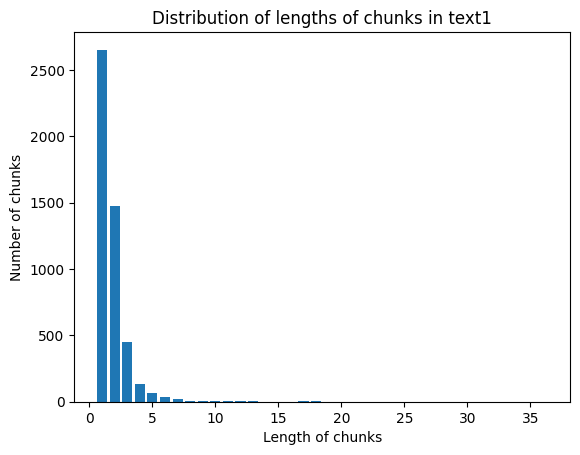

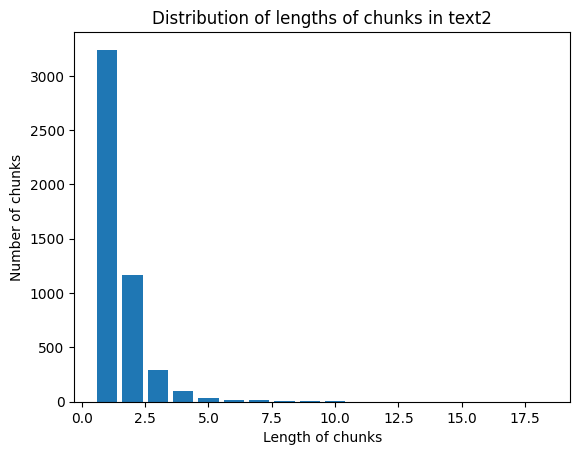

In [22]:
#plot distribution of lengths_1 and lengths_2
import matplotlib.pyplot as plt
#plot the distribution of the lengths of the chunks
plt.bar(value, count)
plt.xlabel('Length of chunks')
plt.ylabel('Number of chunks')
plt.title('Distribution of lengths of chunks in text1')
plt.show()
plt.bar(value2, count2)
plt.xlabel('Length of chunks')
plt.ylabel('Number of chunks')
plt.title('Distribution of lengths of chunks in text2')
plt.show()
